In [ ]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_LZdllcl.csv -O train.csv

!wget https://datahack-prod.s3.amazonaws.com/test_file/test_2umaH9m.csv -O test.csv

!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_M0L0uXE.csv -O sample_submission.csv

In [ ]:
# Import the required packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [ ]:
# Read the train and test data
train=pd.read_csv("train.csv")
train.drop('employee_id',inplace=True,axis = 1)
test=pd.read_csv("test.csv")

In [ ]:
# Check the variables in train data
train.columns

In [ ]:
# Print datatype of each variable
train.dtypes

In [ ]:
# Dimension of the train dataset
train.shape

In [ ]:
# Print the head of train dataset
train.head()

In [ ]:
# Unique values in each variable of train dataset
train.nunique()

### Univariate Analysis

#### Target Variable

In [ ]:
train['is_promoted'].value_counts(normalize=True)

In [ ]:
# Around 91% trainee have promoted
# Unbalanced dataset 

#### Categorical Independent Variables

In [ ]:
plt.figure(1)
plt.subplot(221)
train['department'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Department')

plt.subplot(222)
train['awards_won?'].value_counts(normalize=True).plot.bar(title= 'Awards won')

plt.subplot(223)
train['education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(224)
train['gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

plt.show()

In [ ]:
# Most of the trainee are enrolled for Y and T program_type.
# More number of trainee enrolment for offline test than online test.
# Most of the test are easy in terms of difficulty level.

In [ ]:
train['KPIs_met >80%'].value_counts(normalize=True).plot.bar(title= 'KPI met greater than 80')


In [ ]:
plt.figure(1)
plt.subplot(221)
train['region'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Region')

plt.subplot(222)
train['recruitment_channel'].value_counts(normalize=True).plot.bar(title='Recruitment Channels')

plt.subplot(223)
train['no_of_trainings'].value_counts(normalize=True).plot.bar(title= 'No of Trainings')

plt.subplot(224)
train['previous_year_rating'].value_counts(normalize=True).plot.bar(title= 'Previous year ratings')

plt.show()

In [ ]:
# More male trainee as compared to female trainee
# Most of the trainee have diploma
# Most of the trainee belongs to tier 3 city
# 10% of the trainee are handicapped

#### Numerical Independent Variables

In [ ]:
sns.distplot(train['age']);

In [ ]:
# Most of the trainee are in the age range of 20-30 and 40-50

In [ ]:
sns.distplot(train['length_of_service']);

In [ ]:
sns.distplot(train['avg_training_score']);

### Bivariate Analysis

In [ ]:
# Correlation between numerical variables
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [ ]:
# Not much correlation between the variables

In [ ]:
# program_id vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['department'], train['is_promoted'])

In [ ]:
plt.figure(figsize=(20,8))
# program_type vs is_pass
sns.barplot(train['region'], train['is_promoted'])

In [ ]:
# Trainee in X and Y program type have higher chances to pass the test

In [ ]:
# test_type vs is_pass
sns.barplot(train['recruitment_channel'], train['is_promoted'])

In [ ]:
# Trainee attending online mode of test have higher chances to pass the test

In [ ]:
# difficulty_level vs is_pass
sns.barplot(train['no_of_trainings'], train['is_promoted'])

In [ ]:
# If the difficulty level of the test is easy, chances to pass the test are higher

In [ ]:
# Gender vs is_pass
sns.barplot(train['previous_year_rating'], train['is_promoted'])

In [ ]:
# Gender does not affect the chances to pass the test

In [ ]:
# education vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['education'], train['is_promoted'])

In [ ]:
# Trainee with Masters education level have more chances to pass the test

In [ ]:
plt.figure(figsize=(20,8))
# is_handicapped vs is_pass
sns.barplot(train['length_of_service'], train['is_promoted'])

In [ ]:
# Handicapped trainee have less chances to pass the test

In [ ]:
# city_tier vs is_pass
sns.barplot(train['KPIs_met >80%'], train['is_promoted'])

In [ ]:
# Trainee from city tier 1 have higher chances to pass the test

In [ ]:
# trainee_engagement_rating vs is_pass
sns.barplot(train['awards_won?'], train['is_promoted'])

In [ ]:
# As the trainee engagement rating increases, chances to pass the test also increases

### Missing Values Treatment

In [ ]:
# Check the number of missing values in each variable
train.isnull().sum()

In [ ]:
# age and trainee_engagement_rating variables have missing values in it.

In [ ]:
test = pd.read_csv('test.csv')
test.drop('employee_id',inplace=True,axis = 1)
test.head()

In [ ]:
test['education'].fillna('other',inplace=True)
test['previous_year_rating'].fillna(99,inplace=True)

train['education'].fillna('other',inplace=True)
train['previous_year_rating'].fillna(99,inplace=True)

### Logistic Regression

In [ ]:
train.head()

In [ ]:
# Save target variable in separate dataset
X = train.drop('is_promoted',axis=1)
y = train.is_promoted

In [ ]:
test

In [ ]:
# Apply dummies to the dataset
X=pd.get_dummies(X)
test=pd.get_dummies(test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score


1 of kfold 5
      Iter       Train Loss   Remaining Time 
         1           0.5504            1.37m
         2           0.5355            1.33m
         3           0.5241            1.32m
         4           0.5153            1.33m
         5           0.5072            1.34m
         6           0.5012            1.36m
         7           0.4947            1.37m
         8           0.4900            1.38m
         9           0.4852            1.38m
        10           0.4806            1.38m
        20           0.4402            1.36m
        30           0.4074            1.39m
        40           0.3898            1.36m
        50           0.3709            1.38m
        60           0.3645            1.34m
        70           0.3600            1.30m
        80           0.3551            1.28m
        90           0.3517            1.25m
       100           0.3487            1.23m
       200           0.3223            1.10m
       300           0.3145           56

KeyboardInterrupt: 

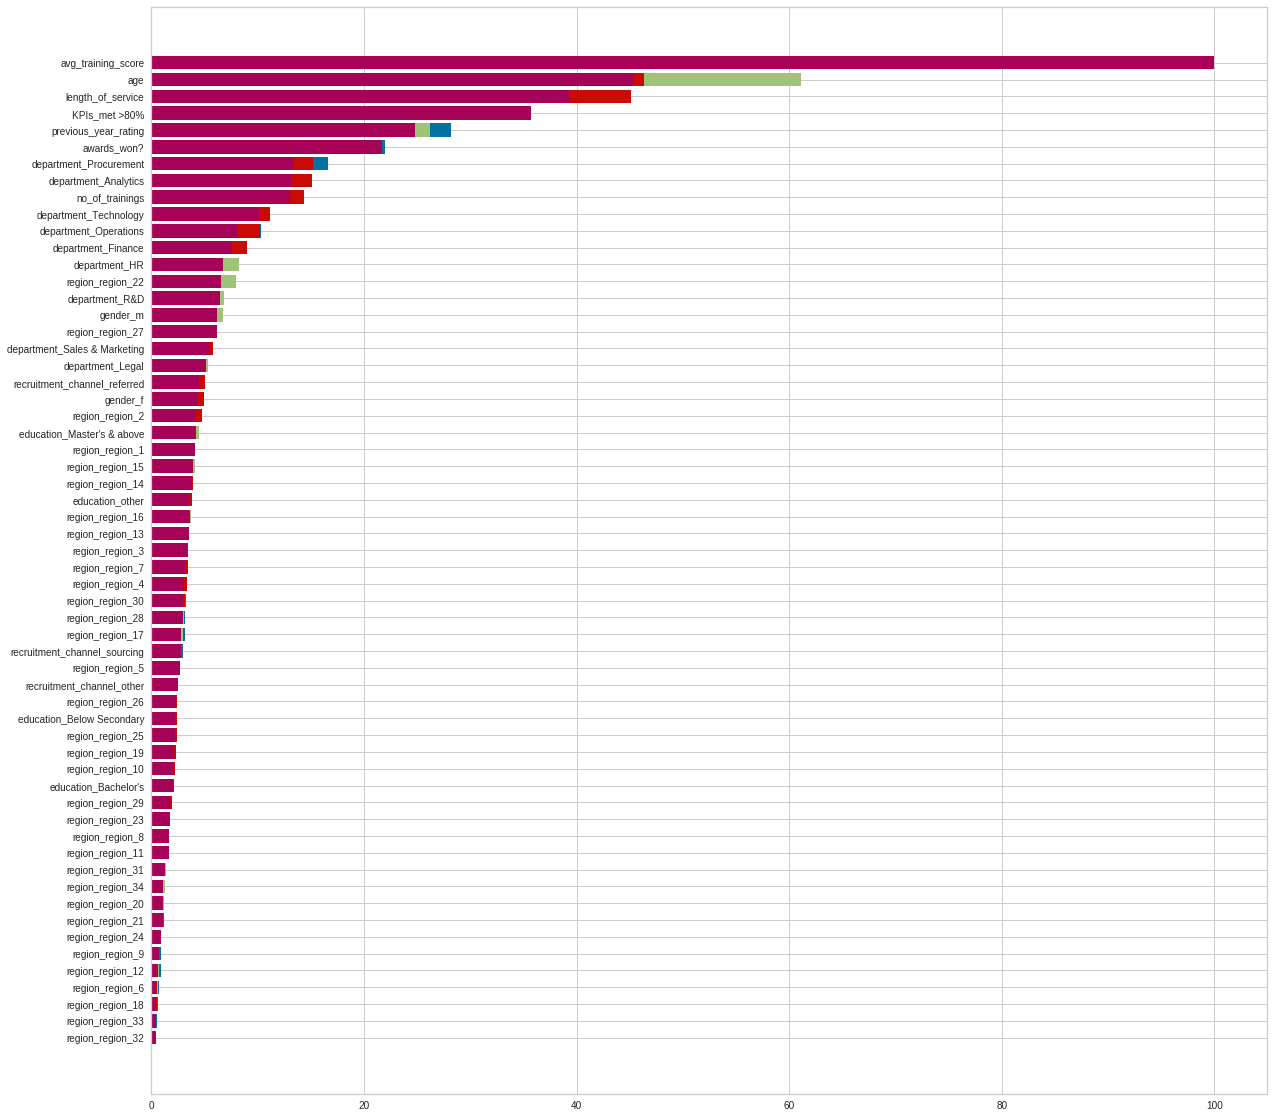

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances

# Create a new matplotlib figure
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()

# Logistic regression using 5 fold stratified cross validation
i=1
scores = []
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = FeatureImportances(GradientBoostingClassifier(n_estimators=1200,verbose=1),ax=ax)
     model.fit(xtr, ytr)
     pred=model.predict_proba(xvl)[:,1]
     score = f1_score(yvl,pred.round())
     print('f1_score',score)
     scores.append(score)
     i+=1
# Making predictions for the test data
pred=model.predict_proba(test)[:,1]
model.poof()
print("Mean accuracy:",np.mean(scores))
print("Standard deviation:",np.std(scores))

In [ ]:
# Read the submission file
submission=pd.read_csv("sample_submission.csv")

In [ ]:
submission.head()

In [ ]:
# Fill the is_pass variable with the predictions
submission['is_promoted']=pred.round()

In [ ]:
submission['is_promoted'] = submission['is_promoted'].astype(np.int64)

In [ ]:
submission.head()

In [ ]:
submission['is_promoted'].value_counts()

In [ ]:
# Converting the submission file to csv format
submission.to_csv('logistic_submission.csv', index=False)

score on leaderboard - 0.71145